<a href="https://colab.research.google.com/github/AsangIngle/Car-Counter/blob/main/U_Net_Convolutional_Networks_for_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

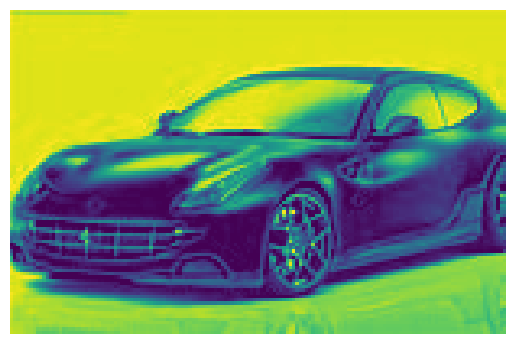

In [174]:
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Conv2DTranspose,Dropout
import numpy as np
import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import random
seed=42
np.random.seed=seed
# Load the image
img_path = "/content/car.jpg"  # Provide the full path to the image file
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found. Please check the file path.")
else:
  img=img.astype(np.float32)
    # Normalize the pixel values (scale to range [0, 1])
  img = img / 255.0

    # Convert the image from BGR (OpenCV default) to RGB for displaying correctly
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
  plt.imshow(rgb_img[:,:,2])
  plt.axis('off')  # Hide axes for better visualization
  plt.show()


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/archive (1).zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
Img_width=128
Img_height=128
Img_channel=3

#input layer
inputs=Input((Img_width,Img_height,Img_channel))

In [ ]:
s=tf.keras.layers.Lambda(lambda x: x/255)(inputs)

In [ ]:
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(inputs)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)



c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout((0.1))(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)


c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout((0.1))(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)


c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4=tf.keras.layers.Dropout((0.2))(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D((2,2))(c4)


c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5=tf.keras.layers.Dropout((0.3))(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)
p5=tf.keras.layers.MaxPooling2D((2,2))(c5)


u6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6=tf.keras.layers.Dropout((0.2))(c6)
c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)



u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7=tf.keras.layers.Dropout((0.2))(c7)
c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)


u8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8=tf.keras.layers.Dropout((0.1))(c8)
c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)



u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9=tf.keras.layers.concatenate([u9,c1])
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9=tf.keras.layers.Dropout((0.1))(c9)
c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)


#u10=tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding='same')(c9)

output=tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

model=tf.keras.Model(inputs=[inputs],outputs=[output])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()




Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_264 (Conv2D)       │ (None, 128, 128, 16)   │            448 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_124 (Dropout)     │ (None, 128, 128, 16)   │              0 │ conv2d_264[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_265 (Conv2D)       │ (None, 128, 128, 16)   │          2,320 │ dropout_124[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_71          │ (None, 64, 64, 16)     │              0 │ conv2d_265[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_266 (Conv2D)       │ (None, 64, 64, 32)     │          4,640 │ max_pooling2d_71[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_125 (Dropout)     │ (None, 64, 64, 32)     │              0 │ conv2d_266[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_267 (Conv2D)       │ (None, 64, 64, 32)     │          9,248 │ dropout_125[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_72          │ (None, 32, 32, 32)     │              0 │ conv2d_267[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_268 (Conv2D)       │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_72[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_126 (Dropout)     │ (None, 32, 32, 64)     │              0 │ conv2d_268[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_269 (Conv2D)       │ (None, 32, 32, 64)     │         36,928 │ dropout_126[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_73          │ (None, 16, 16, 64)     │              0 │ conv2d_269[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_270 (Conv2D)       │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d_73[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_127 (Dropout)     │ (None, 16, 16, 128)    │              0 │ conv2d_270[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_271 (Conv2D)       │ (None, 16, 16, 128)    │        147,584 │ dropout_127[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_74          │ (None, 8, 8, 128)      │              0 │ conv2d_271[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 1,745,025 (6.66 MB)

 Trainable params: 1,745,025 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

print(rgb_img.shape)

(100, 153, 3)


In [ ]:

img2=cv2.resize(rgb_img,(128,128))

In [ ]:
img2.shape
img3=np.expand_dims(img2,axis=0).astype(np.float32)
dummy_label = np.zeros((1, 128, 128, 1))
print(img3.shape)
print(dummy_label.shape)

(1, 128, 128, 3)
(1, 128, 128, 1)


In [ ]:
model.fit(img3, dummy_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9285 - loss: 0.5230


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


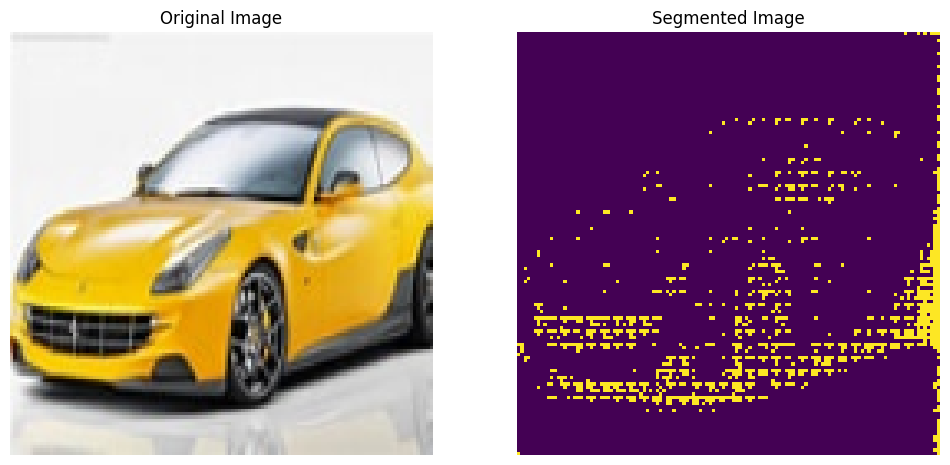

In [ ]:
predicted_mask = model.predict(img3)


threshold = 0.4139
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

#
predicted_mask_resized = np.squeeze(predicted_mask_binary[0], axis=-1)  # Remove the batch dimension

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].imshow(img2)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(predicted_mask_resized, cmap='viridis')
ax[1].set_title("Segmented Image")
ax[1].axis('off')

plt.show()


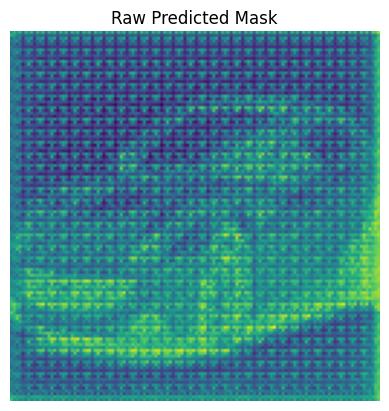

In [ ]:
# Visualize raw predicted mask
plt.imshow(np.squeeze(predicted_mask[0], axis=-1), cmap='viridis')  # Squeeze batch and channel dimensions
plt.colorbar()
plt.title("Raw Predicted Mask")
plt.axis('off')
plt.show()


In [ ]:
""" 'coper' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
  'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
   'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r',
   'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
   'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
   'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray',
   'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', '..."""


" 'coper' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',\n 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',\n  'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',\n   'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r',

In [ ]:
Train_path='/content/train/'
Test_path='/content/test'
train_ids=next(os.walk(Tran_path))[1]
test_ids=next(os.walk(Test_path))

In [175]:
X_train=np.zeros((len(train_ids),Img_width,Img_height,Img_channel)dtype=np.uint8)
y_train=np.zeros((len(train_ids),Img_width,Img_height,1),dtype=np.bool)

for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
  path=Train_path+id_


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-175-377e48178034>, line 1)